In [68]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA,KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

import warnings
warnings.filterwarnings("ignore")
    




In [69]:
# Importing the dataset
data = pd.read_csv('../input/winequality-red.csv')
data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### for improving model performance we need to split all wines types in three category good,fine and bad

In [70]:
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


### Splitting Data 
x = independent values
y = depended values review is the only one depended yea it's review
**notice:
you can select last index into coulmn index by : -1**

In [71]:
x = data.iloc[:, 0:-2].values
y = data.iloc[:, -1].values

### Creatting the Model
 here we create pip line with Standard scaler step(1) and KernelPCA step(2) and logistic regression model step(3) we will change it later any way

 ### A-Dimensionality reduction
you can read more about it here [Principal component](https://en.wikipedia.org/wiki/Principal_component_analysis) , but simply you can reduce your Dimensions easly , the    dimensions is your columns count and this process try to reduce it with out effect with your data.
PCA , PCA KERNEL and plotting explained_variance to see the best components number for setting !

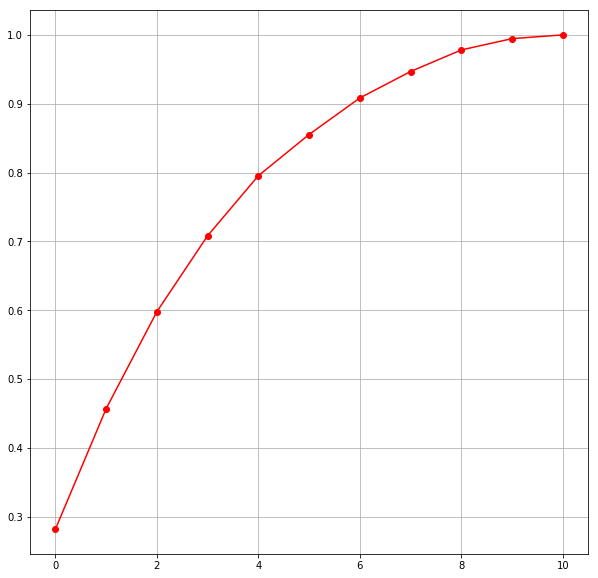

In [72]:
sc_x=StandardScaler()
x = sc_x.fit_transform(x)

pca=PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [73]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)


In [74]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 1)

In [75]:
def classifier(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    return score*100

In [76]:
classifier(KNeighborsClassifier(n_neighbors=100)),classifier(RandomForestClassifier(n_estimators=100)),classifier(LogisticRegression()),classifier(GaussianNB())


(99.0625, 99.375, 99.0625, 98.4375)

Like we see the best for this Case is Random Forest classifier  like always  with estimators count = 100 it's great to see that 99,375% can you do more than that  with the same case lets see what you can do then ?

**Notice: you can get a better result when you Learn how to tunning hyperparametric , Comment if there is thing i miss , and try to get more than that result :"D**